# Project 1: Mobile Price Range Prediction
### Author: Shilpa Roy

This notebook covers all steps from data loading, model training, prediction, and saving the model.

In [6]:
## Step 1: Import Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

## Step 2: Load the Data

In [8]:
df = pd.read_csv('dataset.csv')
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 21)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df.shape)


(2000, 21)


## Step 3: Prepare Features and Target

In [9]:
X = df.drop('price_range', axis=1)
y = df['price_range']

## Step 4: Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Step 5: Feature Scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Model Training

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
## Step 7: Model Evaluation

In [14]:
y_pred = model.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400


Confusion Matrix:
 [[96  4  0  0]
 [ 5 84 11  0]
 [ 0 14 79  7]
 [ 0  0  7 93]]


## Step 8: Feature Importance

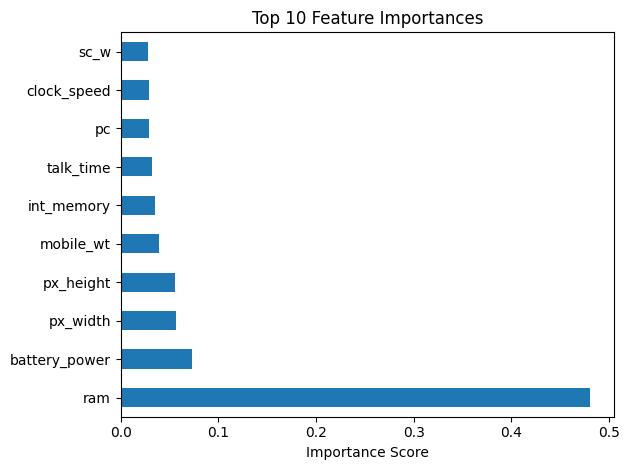

In [15]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## Step 9: Predict Price Range for a New Mobile

In [16]:
# [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_deep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi]
new_phone = [[1200, 1, 2.0, 1, 5, 1, 32, 0.5, 150, 4, 10, 600, 800, 3000, 12, 7, 15, 1, 1, 1]]
new_phone_df = pd.DataFrame(new_phone, columns=X.columns)
new_phone_scaled = scaler.transform(new_phone_df)
predicted_class = model.predict(new_phone_scaled)[0]
price_ranges = ["Low cost", "Medium cost", "High cost", "Very high cost"]
print("Predicted price range for the new phone:", price_ranges[predicted_class])

Predicted price range for the new phone: High cost


## Step 10: Save Trained Model and Scaler

In [17]:
joblib.dump(model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved!")

Model and scaler saved!


## Step 11: Predicting on Another New Phone (using saved model and scaler)

In [19]:
# This would simulate your price_newph.py logic, but in the notebook.
import joblib
import pandas as pd

# Load model and scaler
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Define feature column names (excluding 'price_range')
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
           'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
           'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 
           'touch_screen', 'wifi']

# Enter new phone features as a list inside a list (1 sample, 20 features)
new_phone = [[1800, 1, 2.5, 1, 8, 0, 64, 0.7, 170, 6, 16, 800, 1400, 4000, 14, 7, 16, 1, 1, 1]]

# Convert to DataFrame with column names
new_phone_df = pd.DataFrame(new_phone, columns=columns)

# Scale the new input
new_phone_scaled = scaler.transform(new_phone_df)

# Predict price range
predicted_class = model.predict(new_phone_scaled)[0]

price_ranges = ["Low cost", "Medium cost", "High cost", "Very high cost"]
print("Predicted price range for the new phone:", price_ranges[predicted_class])

Predicted price range for the new phone: Very high cost
